# Evolutionary Algorithm Analysis

Import the libraries

In [1]:
import os
os.chdir('../../')
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt

Set the parameters

In [2]:
filename = './results/EA_individuals_mfgoc_10.csv'
number_of_parameters = 4
number_of_features = 2
parameters_to_plot_2D = [3,2]
selected_individuals = 10
min_parameter_values = numpy.array([1.0e-12,1.0,1.0,1.0e-12])
max_parameter_values = numpy.array([3.0e-11,2.5,2.5,3.0e-11])

Read the file and load the EA data

In [3]:
data = numpy.loadtxt(filename)
print 'Loaded',data.shape[1],'columns and',data.shape[0],'rows'
parameters = data[:,:number_of_parameters]
output = data[:,number_of_parameters:]
hall_of_fame = numpy.argsort(output[:,0])[-selected_individuals:][::-1]
print 'Hall of fame:'
for pos, best_id in enumerate(hall_of_fame):
    print pos+1,". Parameters:",parameters[best_id,:],"Features:",output[best_id,:]

Loaded 6 columns and 37 rows
Hall of fame:
1 . Parameters: [3.21831177e-12 2.00209360e+00 1.75103671e+00 1.93091220e-11] Features: [0.14570121 0.06516522]
2 . Parameters: [1.41108718e-11 2.12171481e+00 1.88269667e+00 1.37431250e-11] Features: [0.10856488 0.12376721]
3 . Parameters: [1.41518577e-11 1.96955124e+00 1.39809328e+00 1.08263542e-12] Features: [0.09909109 0.08955534]
4 . Parameters: [6.99228548e-12 2.05528903e+00 1.97974773e+00 1.67407381e-11] Features: [0.08559227 0.06287855]
5 . Parameters: [1.55361952e-12 1.73064062e+00 1.52308697e+00 1.75648489e-11] Features: [0.08029677 0.02000575]
6 . Parameters: [1.73712716e-11 2.02395564e+00 1.89862492e+00 4.64335505e-12] Features: [0.04435779 0.04820151]
7 . Parameters: [1.85890061e-11 1.79245121e+00 2.39829818e+00 1.13694284e-11] Features: [0.03474348 0.02211303]
8 . Parameters: [1.38575257e-11 1.63287633e+00 1.29633952e+00 2.49158762e-11] Features: [0.02475247 0.01235209]
9 . Parameters: [1.05700089e-11 1.53798190e+00 1.88058377e+00

Plot the parameter and output distribution

<IPython.core.display.Javascript object>


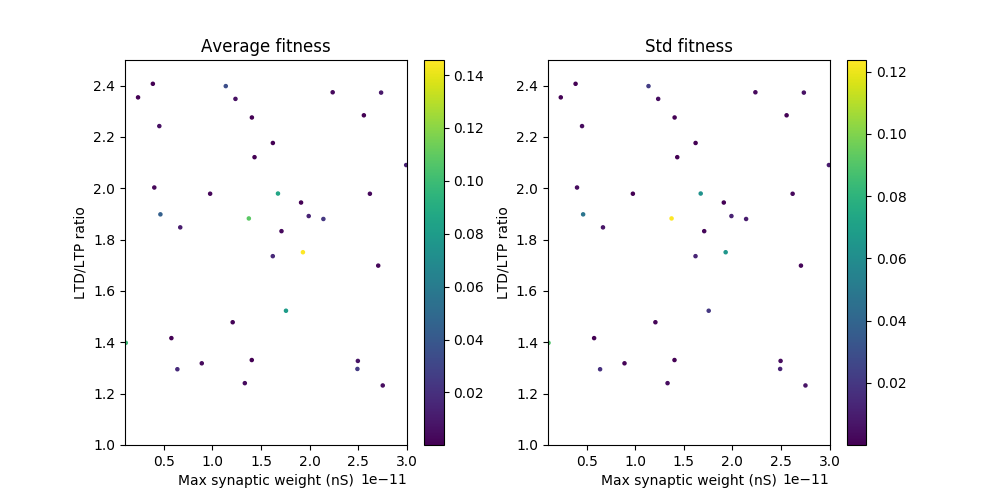

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,0])
plt.title('Average fitness')
plt.xlabel('Max synaptic weight (nS)')
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel('LTD/LTP ratio')
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()
plt.subplot(1,2,2)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,1])
plt.title('Std fitness')
plt.xlabel('Max synaptic weight (nS)')
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel('LTD/LTP ratio')
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()

Plot multiscale scaling of the parameters

<IPython.core.display.Javascript object>


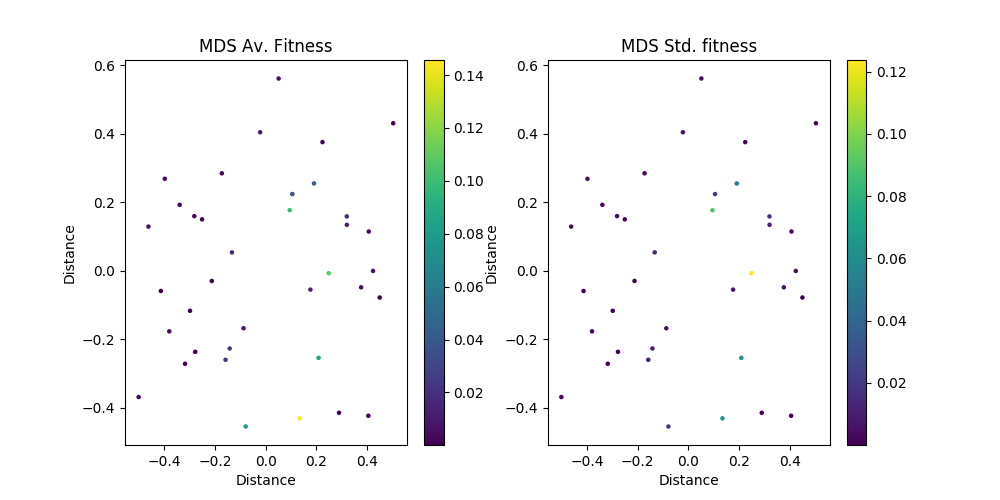

In [5]:
import sklearn.manifold
# Scale the parameters according to the search boundaries
scaled_parameters = (parameters-min_parameter_values)/(max_parameter_values-min_parameter_values)
mds = sklearn.manifold.MDS(number_of_parameters, max_iter=100, n_init=1)
Y = mds.fit_transform(scaled_parameters)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,0])
plt.title('MDS Av. Fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,1])
plt.title('MDS Std. fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.show()